# Projekt 3 - Mozgásérzékelő

Sokszor előfordul veled, hogy tanulás helyett inkább a barátokkal beszélgetsz vagy netezel vagy egyéb jobb elfoglaltságot találsz a szobádban. Természetesen a szülők előszeretettel veszik ezt észre és kihasználják, hogy megdorgálhatnak. Emiatt elgondolkoztál azon, hogy lehetne előre tudni, hogy ők a szoba felé tartanak, anélkül, hogy rájönnének, hogy meglesed őket. 

Egy jól elrejtett megfigyelő kamera jól hangzik, ami a szobád előtti teret figyeli. Sajnos a kamera képét nem használhatod, mert a szüleid is meglátnák, hogy megfigyeled a környéket. Így arra gondoltál, hogy a kamera képéből egy algoritmus alapján megállapítod van-e mozgás, és ha igen, akkor egy LED izzóval jelzed magadnak, hogy valaki közelít.

## Mit fogsz készíteni?

Egy webkamerából (vagy Picam-ből) és egy diódából álló rendszert rakunk össze. A kamera érzékeli a környezetének a képét majd azt elemezve az algoritmusunk eldönti történt-e mozgás vagy sem. Ha a képen elmozdult valami, akkor bekapcsolja a LED lámpát. 

## Mit tanulsz meg?

A mozgásérzékelő projekt elkészítésével a következőket tanulod meg:

* Hogyan működtetjük a LED-ket.
* Hogyan használd az ```opencv``` csomagot a webkamerával való kommunikálásra.
* Hogyan olvassunk ki adatokat a webkameráról.
* Hogyan készíts egy egyszerű mozgásérzékelő algoritmust.
* Hogyan importálj függvényeket modulokból.
* Hogyan ábrázoljunk és frissítsük azt a ```matplotlib.pyplot``` csomag segítségével.

## A projekt részletekre bontása

* Elkészíteni az áramkört.
* Beimportálni a csomagokat amik segtik a munkánkat: ```cv2```, ```time```, ```numpy```, ```matplotlib```, ```datetime```, ```gpiozero``` és saját függvények.
* Létrehozni a kapcsolatot a webkamerával az ```opencv``` csomag használatával. 
* Inicializálni a LED-et.
* Képelemző függvényt írni, ami érzékeli a mozgást.
* Függvényt írni a LED vezérlésére.
* Kinyerni a kamera képnek szélességét és magasságát.
* Inicializálni egy ábrát, ami jelzi majd, ha mozgás történik.
* Végtelen ```while``` ciklusban rögzíteni és elemezni a kamera képet, eldönteni volt-e mozgás, frissíteni a mozgást jelző grafikonunkat.
* A ```q``` billentyű lenyomásával jelezni, hogy befejeztük.
* Bezárni a kapcsolatot a kamerával.

## Áramköri elemek listája

a) [Raspberry PI](https://malnapc.hu/yis/raspberry-pi/rpi-panelek)  (vagy laptop)

b) [Webkamera](https://www.emag.hu/iuni-k6i-webkamera-full-hd-1080p-mikrofonnal-usb-2-0-plug-play-515422/pd/DX66N2MBM/?cmpid=87141&gclid=CjwKCAjwj6SEBhAOEiwAvFRuKL7E3Z6v7Ei_MNy1eFxoAn4ySFojVRVyiqf8BByR43dhONUlKDsrPBoC4sIQAvD_BwE) vagy [Picam](https://malnapc.hu/raspberry-pi-camera-board-v2-8mp)

c) [Jumper wires female/male](https://www.ret.hu/shop/product/e-call/jumper-vezetek-szet_53-22-63) 

d) 1db LED, $I_{max}$ = 20 mA-es: [itt vásárolhatsz](https://www.tme.eu/hu/katalog/tht-led-diodak-5mm_112898/?s_order=desc&search=led&s_field=1000011)

e) 1db 220 - 560 Ohm közötti [ellenállás](https://www.tme.eu/hu/katalog/tht-metal-film-ellenallasok-0-6w_100289/?s_order=desc&search=ellenallas&s_field=1000011)

f) 1db [Breadboard](https://www.tme.eu/hu/katalog/muhelyfelszereles_112607/?s_order=desc&search=breadboard&s_field=1000011)

## A kapcsolási rajz

<img src="schema/prog03_schema.png" width=600 height=400 />

A fenti ábrához hasonlóan kapcsoljuk össze az áramköri elemeket és a Raspberry Pi-t.

1) Helyezzük a piros LED lábait két különboző sorba. Az anódjának (pozitív láb) sorába kössük be az ellenállásunk egyik lábát, míg a másikat kössük a földelésre. A LED katódját (negatív láb) egyelőre szabadon hadjuk. A LED anódjának és katódjának megállapítására használhatunk egy multimétert. Csatlakoztasd a fekete mérőzsinórt a COM (föld) és a piros mérőzsinórt a VΩmA jelzésű hüvelybe. Forgasd el a méréshatárváltó kapcsolót a folytonosság mérés állapotba. Érintsd a két zsínórt a két lábhoz és ha a LED halványan pislákol, akkor az a láb amelyikhez a fekete zsinórt érintetted a katód, a másik az anód. Ha nem pislákol akkor cseréld meg a zsinórok és a lábak érintkezését, hogy világítson.

2) Nevezzük ki a breadboard oldalsó oszlopainak egyikét a közös földelésnek (az ábrán a fekete drótok képviselik). Ide kössük be a LED negatív lábát. Ugyanebbe az oszlopba kössük be a Raspberry Pi egyik **GND** jelölésű tüskéjét is egy jumper drót segítségével.

3) A LED szabadon levő lábát egy jumperrel kössük össze a **2**-es GPIO tüskével.

## A kód

Nyissunk meg egy új python fájlt és mentsük el pl. ```motion_sensor.py``` név alatt. 

Ebben a projektben arra fogunk alapozni, hogy a kamera által készített kép pixeleinek értéke változik mozgás hatására. A kamera képének legnagyobb része nem változik egyik pillanatról a másikra. Így, ha két egymás után rögzített képet kivonunk egymásból, akkor egy üres képet kapunk, ha nem történt mozgás, illetve kirajzolódik egy alakzat ott ahol mozgás történt. Ezt a műveletet a háttér eltávolításának nevezzük.  

Első, egyszerű közelítésnek arra a feltevésre alapozunk, hogy ha álló kép előtt mozgás történik, akkor a háttér eltávolítása után a pixelek értéke változik (remélhetőleg megnövekszik). A mozgásindikátorunk így a pixelértékek szürke színskálájának az összege lesz lenormálva a pixelek és azok értékének számával.  

Ez egy nagyon egyszerű és akár hibás megközelítés is lehet, de az esetek többségében tudunk sikeres mérést végezni. Sajnos ezt a módszert a környezet fényerőssége vagy akár tükröződések is befolyásolják. A fényerősség változást megpróbáljuk kiküszöbölni a kép fényének normalizálásával, hogy nagyjából egyenletes kivilágítású legyen. Ettól sokkalta jobb és hatékonyabb mozgásérzékelő algoritmusok léteznek, de azok felderítését az olvasóra bízzuk.

### Importálások

Első lépésként beimportáljuk a szükséges csomagokat:

* ```cv2``` - webkamerával való kommunikálásra az opencv csomag.
* ```gpiozero``` - a ```LED``` klasszt importáljuk be. 
* ```time``` - a ```sleep``` függvényt használjuk majd késleltetésre.
* ```numpy``` - evvel a csomaggal végezzük a matematikai műveleteket a mátrixokon (kamera által készített képen).
* ```matplotlib.pyplot``` - evvel a csomaggal ábrázoljuk majd a mért fényértékeket.
* ```datetime``` - evvel a csomaggal rögzítjük a méréseink idejét.

Egy előző projektekben már használtunk olyan függvényt, ami egy mért értéket és a hozzá tartozó időt rögzíti, így azt a munkát elmenthetjük egy modulba, ```raspberry_functions.py``` (ennek a modulnak a helye ugyanabban a mappában kell legyen, ahova a fő programunkat, ```motion_sensor.py```, mentettük). Ebbe a modulba írjuk le azt a függvényt, ```prepare_data```, aminek bemenő paraméterei:

* ```date``` - a mérés ideje,
* ```value``` - a mérés értéke,
* ```dplot``` - lista az előző mérési időkkel,
* ```tplot``` - lista az előző mérési értékekkel,
* ```maxlen``` - paraméter, ami meghatározza a mérési listáink elemeinek számát.

```raspberry_functions.py```:

In [2]:
import cv2

def prepare_data(date, value, dplot, tplot, maxlen=20):
	dplot.append(date)
	tplot.append(value)
	if len(dplot) > maxlen:
		dplot.pop(0)
		tplot.pop(0)
	return dplot, tplot

def frame2grayscale(frame):
    return cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

Ugyanide, definiáljunk egy segédfüggvényt is, amit ```frame2grayscale```-nek nevezünk. Ez igazából egy opencv függvény, ami az általunk készített színes képet szürke színskálába alakítja. Ne felejtsük el beimportálni a ```cv2``` csomagot a ```raspberry_functions.py``` modulunkba.

A fő programunkban, így a beimportálások a következőképp néznek ki:

```motion_sensor.py```:

In [4]:
import cv2, time
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from gpiozero import LED
from raspberry_functions import prepare_data, frame2grayscale

### A kamera tesztelése

A következő lépés a kamera tesztelése. Ehhez létrehozzuk a kapcsolatot a kamerával, ```cap = cv2.VideoCapture(0)```. A zárójelben megadott szám a kamera indexére utal (0 az első számú kamera a rendszerben, de ha van több is akkor, 1-et, 2-őt stb. írva kiválaszthatjuk azokat is). Ha nem tudjuk a kameránk indexét, írjunk ```-1```-et. Linux alatt megeshet, hogy az indexelés nem működik, akkor nézzük, meg, az ```ls /dev/video*``` paranccsal a terminálban nézzük meg, hogy milyen kameráink vannak, mielőtt bedugnánk a kameránkat, majd ismét miután bedugtuk. Az újonnan megjelenő elem lesz a mi kameránk lokációja, és evvel is tudunk kapcsolatot teremteni pythonból, ```cap = cv2.VideoCapture('/dev/video0')```.

A ```cap.isOpened()``` paranccsal akár le is ellenőrizhetjük, hogy valóban megnyílt-e a kommunikációs csatorna a gép és a kamera között. Ha a válasz ```False```, akkor próbáljuk meg a ```cap.open()``` (Linux alatt a ```cap.open('/dev/video0')```) paranccsal megnyitni a kommunikációt. 

A ```cap.read()``` paranccsal tudunk fényképet készíteni, amely parancsnak két visszaadott értéke van, az első, ```ret``` megmondja, hogy a fénykép sikeresen elkészült-e, míg a második, ```frame``` tartalmazza a kép ```numpy.array``` mátrixát. Alapértelmezetten a BGR (kék, zöld, piros) színskálában kapjuk meg a képet, de mi azt most átalakítjuk a szürke színskálába a ```frame2grayscale``` parancs segítségével. Ezt a képet a ```cv2.imshow('frame', frame)``` paranccsal meg tudjuk jeleníteni (vagy használhatjuk a ```matplotlib.pyplot```-ból az ```imshow``` függvényt). 

Ezután várunk 3 másodpercet, ```time.sleep(3)```, mielőtt lezárnánk a kapcsolatot a kamerával, ```cap.release()```, amit érdemes minden egyes alkalommal megtenni, ha a programunknak vége van. A biztonság kedvéért még bezárunk minden ablakot is amit a programunk nyitott meg, ```cv2.destroyAllWindows()```.

```motion_sensor.py```:

In [ ]:
import cv2, time
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from gpiozero import LED
from raspberry_functions import prepare_data, frame2grayscale

cap = cv2.VideoCapture(0) # cap = cv2.VideoCapture('/dev/video0')

ret, frame = cap.read()
frame = frame2grayscale(frame)  # szurke szinskala
cv2.imshow('frame', frame)

time.sleep(3)

cap.release()
# Bezarunk minden ablakot, amit a program megnyitott
cv2.destroyAllWindows()

### LED tesztelése

Most a LED-et inicializálva leteszteljük annak működését. Elsőnek inicializáljuk a LED-et (2-es GPIO pin). Majd ha a kamera elkészítette a képet, be- és kikapcsoljuk a LED-et.

```motion_sensor.py```:

In [ ]:
import cv2, time
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from gpiozero import LED
from raspberry_functions import prepare_data, frame2grayscale

cap = cv2.VideoCapture(0) # cap = cv2.VideoCapture('/dev/video0')
led = LED(2)   # LED inicializalas

ret, frame = cap.read()
frame = frame2grayscale(frame)  # szurke szinskala
cv2.imshow('frame', frame)

time.sleep(3)

led.on()          # led bekapcsolasa
time.sleep(2)     # 2 masodperc varakozas
led.off()         # led kikapcsolasa

cap.release()
# Bezarunk minden ablakot, amit a program megnyitott
cv2.destroyAllWindows()

### Segédeszközök

Itt bemutatunk néhány függvényt ami általánosságban segítségére lehet az embernek, ha kamerával dolgozik. Bemutatjuk, hogy lehet a készítendő kép paramétereit kiolvasni a kamerából illetve, hogyan lehet kiegyenlíteni a fényerőt a kép különböző részein.

#### Kép pixel méretének meghatározása a kamera paramétereiből

Mielőtt képet készítenénk, az ```opencv``` segítségével beállíthatjuk, hogy mekkora legyen a kép pixel mérete (```set```, parancs) vagy épp kiolvashatjuk a kamerából, ```cap```, hogy mekkora az aktuális kép méret (```get``` parancs). A képméret pixel magassága és szélessége a ```cv2.CAP_PROP_FRAME_HEIGHT``` és ```cv2.CAP_PROP_FRAME_WIDTH``` paraméterekkel olvashatók ki. 

In [ ]:
cap = cv2.VideoCapture(0)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)

#### Kontraszt módosítás

Fényképek készítésekor a kép nem mindig sikerül kontrasztosra. Ezt mesterségesen kicsit lehet javítani. Evvel a képbe újonnan bemozdult tárgyat kontrasztosabbá tehetjük a kép többi részéhez képest. Meg kell jegyezni, hogy sajnos a módszer a zajt felerősítheti míg a jelet lecsökkentheti, bizonyos körülmények között.

Nézzünk egy példát, hogy lehet alkalmazni a kontraszt javítására. Először beolvassuk az ábrázoláshoz szükséges ```matplotlib``` csomagot, illetve egy képet (szürke színskálán).

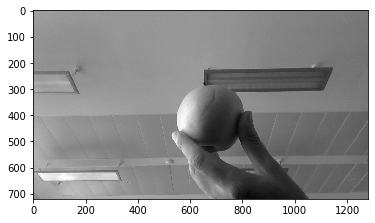

In [52]:
import matplotlib.pyplot as plt               # abrazolo csomag

apple = cv2.imread('./prog03/apple.jpg', 0)
plt.imshow(apple, cmap='gray')

Az ```opencv```-ből a ```equalizeHist``` függvényt használjuk a kontraszt javítására. Persze más csomagban is vannak hasonló függvények, illetve az elméleti hátteret ismerve, magunktól is lekódolhatjuk a függvényt, ha kell. Látható, hogy a kéz sötétebbik része még sötétebb lett, míg amelyik fényt kapott, még világosabb lett. Jobban azonosíthatóak a körvonalak.

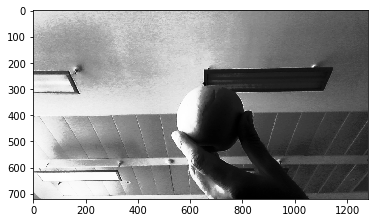

In [53]:
plt.imshow(cv2.equalizeHist(apple), cmap='gray')

### Függvény a mozgásérzékelés indikátorának kiszámolására

Ahogy említettük, a mozgás indikátora a háttérlevont képből jön létre. Ennek bemutatására beolvasunk két képet, egy háttér és egy almás kép. Meghatározzuk a méreteiket a ```.shape``` metódussal. A képeken elvégezzük a kontraszt javítást is. Majd ábrázoljuk mindkét képet, hogy vizuálisan lássuk a különbséget. Tekintsünk úgy a két képre, hogy a kettő között eltelt időben elmozdulás történt (megjelent egy alma a képen). 

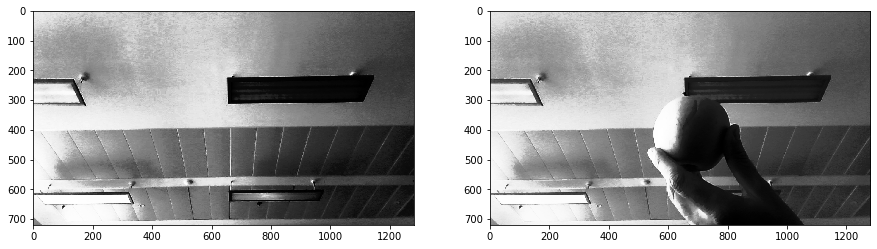

In [54]:
bck = cv2.imread('./prog03/bckgnd.jpg', 0)    # hatter beolvasasa
bck = cv2.equalizeHist(bck)
apple = cv2.imread('./prog03/apple.jpg', 0)   # uj kep beolvasasa
apple = cv2.equalizeHist(apple)

height, width = bck.shape                    # kep meretenek meghatarozasa

fig, ax = plt.subplots(1,2, figsize=(15,30)) # abra definialas
ax[0].imshow(bck, cmap='gray')                            # hatter plot
ax[1].imshow(apple, cmap='gray')                          # almas kep plot

Vonjuk ki a hátteret az almás képből, ```delta```, és referencia ként önmagából is, ```delta_bck```. A ```delta``` kinézetét a lenti ábra bal oldali képe mutatja. Jól látható, hogy ahol a háttér megegyezett, ott inkább sötét a kép, de az alma résznél jól körvonalazódik a kéz és az alma. Az újonnan képbe került alakzatok evvel a technikával legtöbbször jól elkülönülnek. Hogy növeljük a detektálás érzékenységét, thresholddal az új alakzat pixel értékét (azon pixelek értékét, amelyek egy általunk megadott határértéktől nagyobb értékkel rendelkeznek) 255-re növeljük, minden mást 0-ra csökkentünk (lásd az alábbi ábra középső képe). Referenciaként a jobb oldali képen lent, megmutatja, hogy nézne ki a háttérlevonás, ha nem történik elmozdulás (mondjuk valós esetben zaj lenne a képen).   

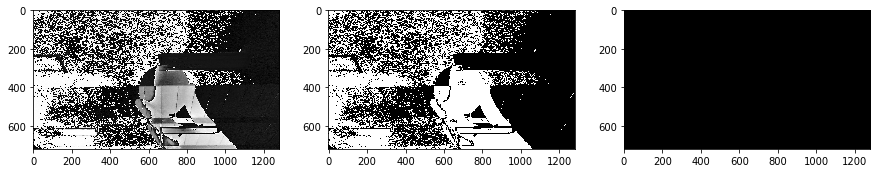

In [55]:
delta = apple - bck         # hatter levonasa az almas kepbol
delta_bck = bck - bck       # hatter levonasa hatterbol
# thresholdolas
ret, delta_thresh = cv2.threshold(delta, 50, 255, cv2.THRESH_BINARY)

fig, ax = plt.subplots(1,3, figsize=(15,30))
ax[0].imshow(delta, cmap='gray')
ax[1].imshow(delta_thresh, cmap='gray')
ax[2].imshow(delta_bck, cmap='gray')

A mozgásérzékelő indikátorát úgy számoljuk ki, hogy a kapott ```delta_thresh``` és ```delta_bck``` pixeljeinek értékét összeadjuk. Mivel a pixelek értéke 0 és 255 között változhat, az összegünk valószínűleg egy nagy szám lenne. Hogy ez az összeg egy értelmezhetőbb tartományban, pl. 0 és 1 között legyen, lenormáljuk a ```calibration``` változóval, ami a kép szélességének, hosszúságának és a pixelek összes lehetséges értékének (256) a szorzata. 

In [51]:
calibration = height * width * 256           # kalibracios ertek kiszamitasa
print(np.sum(delta_thresh) / calibration, np.sum(delta_bck) / calibration)

0.41492125193277996 0.0


Mindezeket a fenti lépéseket egy függvényben összegezzük, ahova bemenő paraméter a háttérlevont kép, ```frame```, a kalibrációs érték és a ```limit```, amivel a threshold határértékét állíthatjuk be. 

In [ ]:
def motion_sensor(frame, calibration, limit=2):
    ret, frame = cv2.threshold(frame, limit, 255, cv2.THRESH_BINARY)
    return np.sum(frame) / calibration

### Függvény a LED vezérlésére

Ha a mozgásérzékelő indikátorunk bejelez, akkor a LED-et fel kell kapcsolnunk. Ehhez írunk egy függvényt, ```led_control```, aminek a bemenő paraméterei a LED objektum, ```led```, az indikátor, ```value``` és a limit, ```threshold```, amit az indikátor ha átlép, akkor bekapcsol a LED. 

In [56]:
def led_control(led, value, threshold = 0.8):
    if value > threshold:
        led.on()
    else:
        led.off()

### Indikátor ábrázolása és a mozgásérzékelő kód

Készen állunk a teljes kód megírásához. A kód eleje nem sokat változik, beimportálunk, videó és LED objektumot inicializálunk, definiáljuk a fent átbeszélt függvényeket, kinyerjük a kamerából a szélesség és magasság adatokat, majd kiszámoljuk a kalibrációs értéket.

Ezután már el is készítjük az első képet ```cap.read()```, amit átalakítunk szürke színskálára és feljavítjuk a kontrasztját. 

A következő lépés, hogy előkészítsük az indikátorunk vizuális ábrázolását. Első lépésként meghatározzuk, hány eleme legyen, ```maxcount```, a listánknak amiben az indikátort gyűjtjük. Inicializálunk egy időtároló, ```dplot``` és egy indikátor tároló, ```tplot```, listát, amiket majd az újabb mérésekkel feltöltünk. Majd, ábrázoljuk az első mérésünket, ```line1, = ax.plot(dplot, tplot, 'o-')```.

Ezután térünk át a fő részre, a végtelen ```while``` ciklusra, ahol frissítjük a méréseket és az ábrát. Első lépésként újabb képet készítünk, ```frame1```, amit szintén szürke skálába alakítjuk és javítunk a kontrasztján. Vigyázzunk arra, hogy az előző képet, ```frame``` még ne írjuk felül, hiszen az lesz a hátterünk amit levonunk az új képből, ```delta_frame```. Ha meg van a háttér levont kép, akkor kiszámítjuk a hozzá tartozó mozgás indikátort, ```motion```. Ezt az értéket és a hozzá tartozó időpontot elmentjük a ```tplot``` és ```dplot``` változókba, amit később a frissített ábrán majd meg is jelenítünk. 

Következő lépésként az indikátor alapján vezéreljük a LED működését, ```led_control```. Majd jön az egyik legfontosabb lépés ami nélkül a kód nem fog rendesen működni. Az újonnan készített képet, ```frame1```, elmentjük mint háttér a ```frame``` változóba, ugyanis a következő ciklusban ez lesz a háttérkép. Tehát a háttérképet is minden ciklusban folyamatosan frissítjük, nem csak újabb képeket készítünk. 

Végül már csak az ábra frissítése marad, ```line1.set_xdata(dplot)```, ```line1.set_ydata(tplot)```, néhány grafikon beállítással. Emellé fenntartjuk a lehetőséget, hogy a ```q``` billentyű lenyomásával kiléphessünk a programból. Ha a kilépés mellett döntünk akkor az ablakok és a kamerával való kommunikációt be kell zárni.

```motion_sensor.py```:

In [51]:
import cv2, time
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from gpiozero import LED
from raspberry_functions import prepare_data, frame2grayscale

cap = cv2.VideoCapture(0)
led = LED(2)


def motion_sensor(frame, calibration, limit=2):
    ret, frame = cv2.threshold(frame, limit, 255, cv2.THRESH_BINARY)
    return np.sum(frame) / calibration

def led_control(led, value, threshold = 0.8):
    if value > threshold:
        led.on()
    else:
        led.off()


height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
calibration = height * width * 256

ret, frame = cap.read()
frame = frame2grayscale(frame)
frame = cv2.equalizeHist(frame)

max_count = 20              # hany eleme legyen a listanknak
dplot = [dt.datetime.now()] # idopont lista inicializalas
tplot = [motion_sensor(frame, calibration)] # indikator lista inicializalas
	
plt.ion()   # plottolas interaktivva tevese (nem all meg a program a plot utan)

figure, ax = plt.subplots(1,1, figsize=(8,6)) # abra meretenek definialasa
line1, = ax.plot(dplot, tplot, 'o-') # indikator plottolasa az ido fuggvenyeben


while True:
    ret, frame1 = cap.read()
    frame1 = frame2grayscale(frame1)
    frame1 = cv2.equalizeHist(frame1)

    delta_frame = frame1-frame    # hatter levonal
    motion = motion_sensor(delta_frame, calibration)  # indikator szamitas

    # meresi listak frissitese
    dplot, tplot = prepare_data(dt.datetime.now(), motion, dplot, tplot)

    led_control(led, motion, threshold=0.8)  # szukseg eseten a LED kapcsolasa
    frame = frame1  # az uj hatter az elozo kep

    # plottolt indikator ertekek frissitese az abran
    line1.set_xdata(dplot)
    line1.set_ydata(tplot)
    ax.set_ylim(min(tplot)*0.99,max(tplot)*1.01) # +1 to avoid singular transformation warning
    ax.set_xlim(min(dplot),max(dplot))
    figure.canvas.draw()
    figure.canvas.flush_events()
    plt.gcf().autofmt_xdate()

    # q billentyu lenyomasara kilepes
    if cv2.waitKey(100) & 0xFF == ord('q'):
        break
    time.sleep(0.2)

cap.release()
# Bezarunk minden ablakot, amit a program megnyitott
cv2.destroyAllWindows()

## A projekt tesztelése

Miután összeszereltük az áramkört és a kódot is megírtuk, amit pl. ```motion_sensor.py``` név alatt mentettünk el, megnyithatunk a Raspberry Pi operációs rendszerén egy terminált. A terminálban a ```cd 'mappa név'``` paranccsal elnavigálunk abba a mappába, ahova a ```motion_sensor.py```-t elmentettük. Ott begépelve a ```motion_sensor.py``` parancsot, letesztelhetjük a programunk működését. Ha minden jól megy akkor a program elindításával megjelenik egy grafikon ami ábrázolja az értéket ami a mozgás jelenlétét követi nyomon. Ha az érték 0.8 fölé megy, akkor a LED bekapcsol, ha alatta marad, akkor a LED nem világít. Ezt tesztelhetjük, ha a kamera előtt mozgunk. Vigyázzunk arra, hogy a fényviszonyok változása is kiválthat a programban mozgás érzetet (hiszen ez egy elég egyszerű kód). 

Hibaüzenetek esetén ki kell deríteni mi lehetett a probléma, pl. elgépelés, egy modul hiányzik, sorok megfelelő behúzása, idézőjel lemaradása stb. A hibaüzenet legtöbbször segít abban, hogy melyik sorban találta a hibát és hogy mi volt az. Egy kis gyakorlással bele lehet jönni azok értelmezésébe, valamint interneten is rá lehet keresni a hibaüzenet jelentésére és annak lehetséges elhárítására.

## Mit lehet javítani/továbbfejleszteni?

* Változtassuk meg a ```led_control``` függvényben a ```threshold``` paraméter értékét és figyeljük meg az hogy befolyásolja a mozgásérzékelőnk működését.
* Változtassuk meg a ```motion_sensor``` függvényben a ```limit``` paraméter értékét és figyeljük meg az hogy befolyásolja a mozgásérzékelőnk működését.

Írd meg kommentben, hogy szerinted mivel lehetne még feldobni ezt a kis programot!

## Referencia

1) https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html

2) LED objektum leírása - https://gpiozero.readthedocs.io/en/stable/api_output.html#led

3) numpy - https://numpy.org/doc/stable/user/quickstart.html

4) modul importálás - https://www.programiz.com/python-programming/modules

5) matplotlib leírása - https://pythonspot.com/matplotlib-update-plot/

6) cv2.threshold leírása - https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html

7) cv2.equalizeHist leírása - https://docs.opencv.org/3.4/d4/d1b/tutorial_histogram_equalization.html